In [1]:
import pandas as pd # Data manipulation and analysis library work with structure data'Excel' 
import numpy as np# numeric library 
from sklearn.impute import SimpleImputer# work with ML that handling missing data by replacing 
import seaborn as sns # anthor library for virtualization that use with matplot to make a beuty
import matplotlib.pyplot as plt# virtualization library 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn") # to remove any warning
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("processed_data_after_scalling.csv")

In [3]:
selected_features = [
    "Have you ever had suicidal thoughts ?",
    "Academic Pressure",
    "Financial Stress",
    "Work/Study Hours",
    "Dietary Habits",
    "Age",
    "Depression"
] 
selected_data = data[selected_features]
 
selected_data.to_csv("selected_features.csv", index=False)

In [4]:
X = selected_data.drop(columns=["Depression"])  # Features
y = selected_data["Depression"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

In [6]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [7]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [8]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'random'}


In [9]:
y_pred = best_model.predict(X_test)

In [10]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

train_accuracy = best_model.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)


Test Accuracy: 0.8327956989247312
Train Accuracy: 0.8478806344654539


In [11]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      2313
         1.0       0.85      0.87      0.86      3267

    accuracy                           0.83      5580
   macro avg       0.83      0.82      0.83      5580
weighted avg       0.83      0.83      0.83      5580



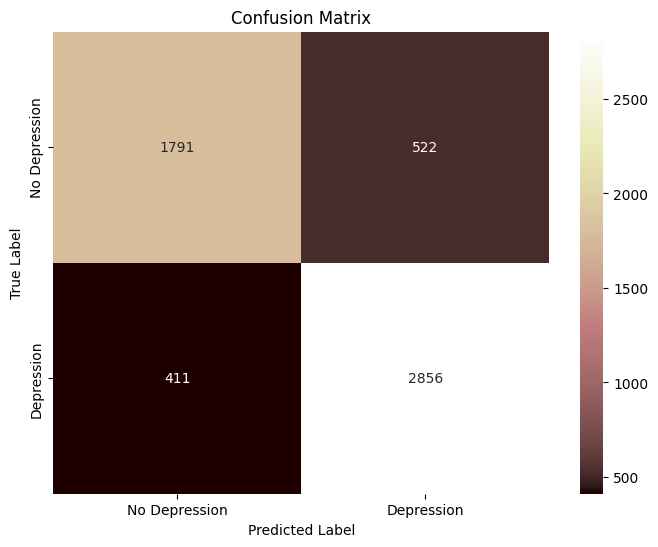

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()